# UNIVERSIDAD POLITÉCNICA SALESIANA 
# El VECINO - CUENCA

**Estudiante:**Gustavo Guallpa

**Profesor:** Ing. Diego Quisi

**Asignatura:** Simulación

**Fecha:** 04/11/2020.

**Tema:** Regresión Lógistica:COVID-19 ECUADOR

# Ejercicio
**BASE DE DATOS ACTUALIZADA DEL COVID-19 EN ECUADOR**

Para la obtención de los datos se hizo una recolección que es propiamente realizada por el estudiante , de fuentes que se encuentran citadas en las referencias, los datos estan hasta la fecha de 30 de Octubre de 2020.


In [185]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,recall_score,f1_score,roc_auc_score,precision_score
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [186]:
#Leemos los datos.
path='covid19.csv'
df=pd.read_csv(path)
#df.head(300)
df

,dateRep,day,month,year,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,2020-02-28,28,2,2020,Ecuador,2020-03-01T23:33:03,-1.8312,-78.1834,1,0,0,NaN,NaN,NaN,NaN
1,2020-02-29,29,2,2020,Ecuador,2020-03-01T23:33:03,-1.8312,-78.1834,3,0,0,NaN,NaN,NaN,NaN
2,2020-03-01,1,3,2020,Ecuador,2020-03-01T23:33:03,-1.8312,-78.1834,6,0,0,NaN,NaN,NaN,NaN
3,2020-03-02,2,3,2020,Ecuador,2020-03-01T23:33:03,-1.8312,-78.1834,6,0,0,NaN,NaN,NaN,NaN
4,2020-03-03,3,3,2020,Ecuador,2020-03-03T15:13:26,-1.8312,-78.1834,7,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2020-10-26,26,10,2020,Ecuador,27-10-20 04:24,-1.8312,-78.1834,162178,12573,141759,7846.0,Ecuador,919.216961,7.752593
242,2020-10-27,27,10,2020,Ecuador,28-10-20 04:24,-1.8312,-78.1834,163192,12588,141759,8845.0,Ecuador,924.964264,7.713613
243,2020-10-28,28,10,2020,Ecuador,29-10-20 04:24,-1.8312,-78.1834,164908,12608,141759,10541.0,Ecuador,934.690468,7.645475
244,2020-10-29,29,10,2020,Ecuador,30-10-20 04:24,-1.8312,-78.1834,166302,12622,141759,11921.0,Ecuador,942.591591,7.589806


In [187]:
df = df.loc[:,['dateRep','Confirmed']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['dateRep']
df['dateRep'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-28", FMT)).days)
df

,dateRep,Confirmed
0,0,1
1,1,3
2,2,6
3,3,6
4,4,7
...,...,...
241,241,162178
242,242,163192
243,243,164908
244,244,166302


Text(0, 0.5, 'Número Casos')

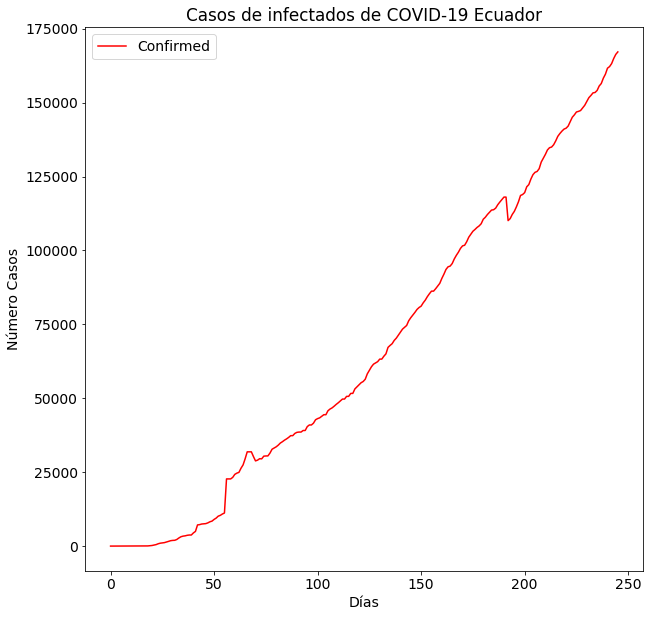

In [196]:
# Represento los datos generados
plt.rcParams['figure.figsize'] = [10, 10]
ax = df.plot(x ='dateRep', y='Confirmed',color='red',title='Casos de infectados de COVID-19 Ecuador')
ax.set_xlabel("Días")
ax.set_ylabel("Número Casos")


## 1) Regresión lineal simple
**Introducción al modelo**

La regresión lineal simple parte de una sóla variable predictora, es decir X=x1dondeX∈R y supone que existe aproximadamente una relación lineal entre X e Y. Esta relación lineal puede ser escrita como:


![title](1.PNG)

Los términos β0 y β1 representan respectivamente el interceptor(β0-ordenada en el origen ) y la pendiente(β1 ) del modelo lineal.

Una vez obtenida la estimación de estos dos coeficientes se puede predecir la variable Y usando X conocidos y a partir de la siguiente fórmula:


![title](2.PNG)


In [206]:
x = list(df.iloc [:, 0]) # Fecha
y = list(df.iloc [:, 1]) # Numero de casos

# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()
 
# Entreno el modelo con los datos (X,Y)
modelo.fit(np.array(x).reshape(-1,1), y)

#Ahora vamoa a calcular b_0
print (u'Ordenada al origen: ', modelo.intercept_)

# Ahora puedo obtener el coeficiente b_1
print (u'Pendiente: ', modelo.coef_[0])
beta = modelo.coef_[0]#Modificar el valor de la pendiente.
# Podemos predecir usando el modelo
y_pred = modelo.predict(np.array(x).reshape(-1,1))
 
# Por último, calculamos el error cuadrático medio y el estadístico R^2(Precisión del modelo.)
print (u'Error cuadrático medio: %.2f' % mean_squared_error(y, y_pred))
print (u'Estadístico R_2: %.2f' % r2_score(y, y_pred))

Ordenada al origen:  -20794.16256871067
Pendiente:  712.6381945214146
Error cuadrático medio: 48555124.23
Estadístico R_2: 0.98


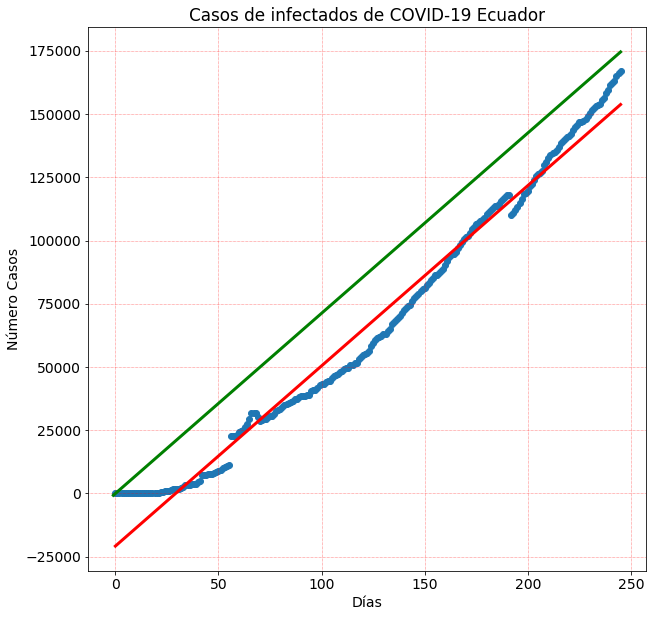

In [207]:
#Graficar

# Representamos el ajuste (rojo) y la recta Y = beta*x (verde)
plt.scatter(x, y)#Dibujo mis puntos originales
plt.plot(x, y_pred, color='red',linewidth=3.0) #Dibujo con os valores ya predecidos.

#Bibujamos puntos reales.
x_real = np.array([-1, 245])
y_real = x_real*beta
plt.plot(x_real, y_real, color='green',linewidth=3.0)


#Propiedades
plt.title('Casos de infectados de COVID-19 Ecuador')
plt.xlabel('Días')
plt.ylabel('Número Casos')
plt.grid(color='r', linestyle='dotted', linewidth=0.5)
plt.show()


## 2) Regresión Logística

El modelo logístico se ha utilizado ampliamente para describir el crecimiento de una población. Una infección puede describirse como el crecimiento de la población de un agente patógeno, por lo que un modelo logístico parece razonable .
La expresión más genérica de una función logística es:

![title](1.PNG)

En esta fórmula, tenemos la variable x que es el tiempo y tres parámetros: a, b, c .

- a se refiere a la velocidad de infección
- b es el día en que ocurrieron las infecciones máximas
- c es el número total de personas infectadas registradas al final de la infección


Text(0, 0.5, 'Número Casos')

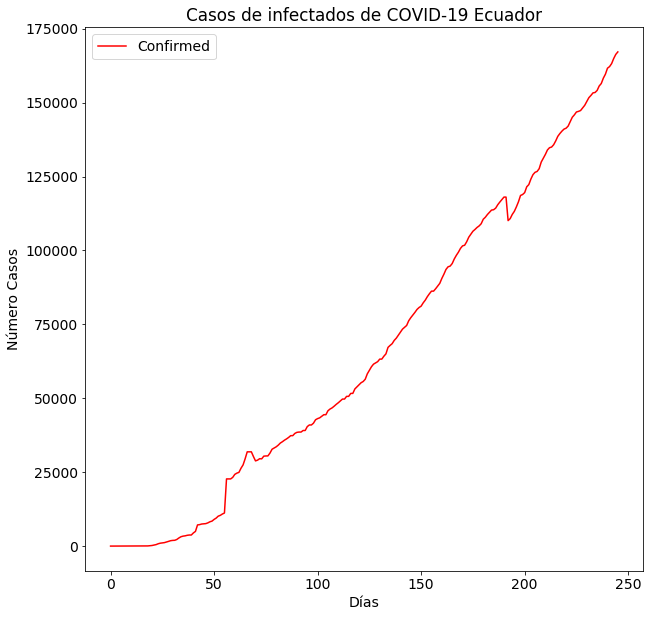

In [203]:
#Leemos los datos.
path='covid19.csv'
df=pd.read_csv(path)
#df.head(300)
df = df.loc[:,['dateRep','Confirmed']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['dateRep']
df['dateRep'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-02-28", FMT)).days)
# Represento los datos generados
ax = df.plot(x ='dateRep', y='Confirmed',color='red',title='Casos de infectados de COVID-19 Ecuador')
ax.set_xlabel("Días")
ax.set_ylabel("Número Casos")

(array([-131408.11091119,   43882.45116106]), array([[ 79586409.03012465, -16862892.90046391],
       [-16862892.90046391,   3733836.67859665]]))


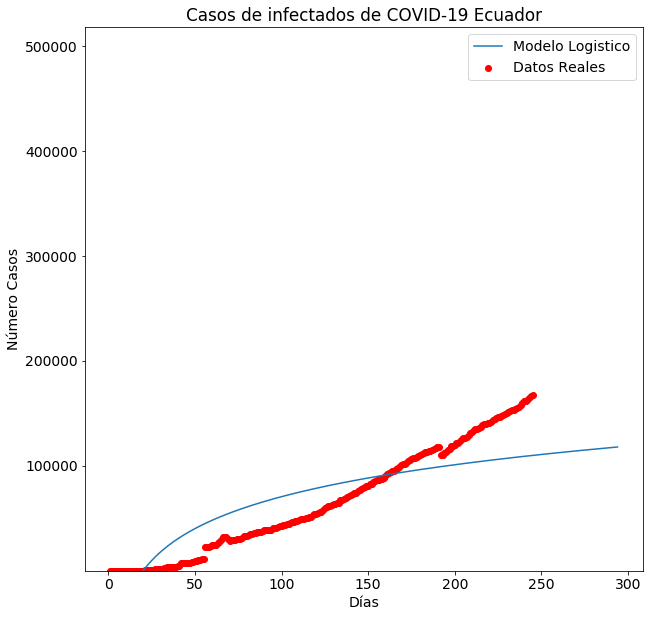

In [204]:
x = list(df.iloc [1::, 0]) # Fecha
y = list(df.iloc [1::, 1]) # Numero de casos


def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

pred_x = list(range(min(x),max(x)+50)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.title('Casos de infectados de COVID-19 Ecuador')
plt.xlabel("Días")
plt.ylabel("Número Casos")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()


## CONSTRARESTAR  EL MODELO LINEAL CON EL MODELO LOGISTICO SOBRE CUAL ES EL MEJOR MODELO PARA LA PREDICCION DE DATOS.

Desde mi punto de vista para mi si me dieran a escoger , yo escogería el modelo logístico en el caso que se trata de clasificar, pero si se tratade regresión es decir de predecir una probabilidad el modelo lineal es el mejor.
Para el caso que estamos analizando que es el caso de COVID-19 en Ecuador, el mejor modelo es el de **REGRESIÓN LINEAL**.

# REFERENCIAS

https://github.com/CSSEGISandData/COVID-19

https://data.europa.eu/euodp/es/data/dataset/covid-19-coronavirus-data

http://www.gisandbeers.com/descarga-datos-de-coronavirus-actualizados-diariamente-covid19/

https://aprendeia.com/algoritmo-regresion-logistica-machine-learning-practica-con-python/

https://aprendeia.com/regresion-logistica-multiple-machine-learning-teoria/
